In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 6.5 kB/s 
     |████████████████████████████████| 6.0 MB 41.2 MB/s 
     |████████████████████████████████| 1.7 MB 56.1 MB/s 
     |████████████████████████████████| 439 kB 71.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully 

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 4.5 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
import pandas_datareader.data as web
import pandas as pd
from datetime import datetime


In [ ]:
data=web.get_data_yahoo('MSFT')

In [ ]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-27,83.980003,83.300003,83.309998,83.870003,18265200.0,78.981621
2017-11-28,85.059998,84.019997,84.070000,84.879997,21926000.0,79.932762
2017-11-29,84.919998,83.180000,84.709999,83.339996,27381100.0,78.482529
2017-11-30,84.519997,83.339996,83.510002,84.169998,33054600.0,79.264122
2017-12-01,84.809998,83.220001,83.599998,84.260002,29532100.0,79.348915
...,...,...,...,...,...,...
2022-11-18,243.740005,239.029999,243.509995,241.220001,27591800.0,241.220001
2022-11-21,244.669998,241.190002,241.429993,242.050003,26394700.0,242.050003
2022-11-22,245.309998,240.710007,243.589996,245.029999,19665700.0,245.029999


In [ ]:
data1=data.reset_index()['Close']

In [ ]:
data1

0        83.870003
1        84.879997
2        83.339996
3        84.169998
4        84.260002
           ...    
1254    241.220001
1255    242.050003
1256    245.029999
1257    247.580002
1258    247.490005
Name: Close, Length: 1259, dtype: float64

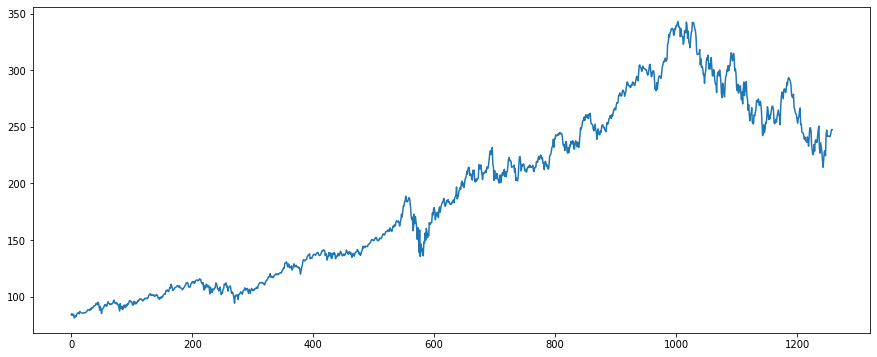

In [ ]:
data1.plot(figsize=(15,6))

In [ ]:
### LSTM are sensitive to the scale of data ,apply minmax or standard sclar

In [ ]:
import numpy as np


In [ ]:
data0=data1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
SD=MinMaxScaler(feature_range=(0,1))
data1=SD.fit_transform(np.array(data1).reshape(-1,1))


In [ ]:
data1.shape

(1259, 1)

In [ ]:
data1

array([[0.01064764],
       [0.01450214],
       [0.00862495],
       ...,
       [0.62569174],
       [0.63542346],
       [0.63508001]])

In [ ]:
training_size=int(len(data1)*0.65)
testing_size=len(data1)-training_size
train_data=data1[0:training_size,:]
test_data=data1[training_size:len(data1),:1]

In [ ]:
training_size,testing_size

(818, 441)

In [ ]:
import numpy
def split(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return numpy.array(dataX),numpy.array(dataY)

In [ ]:

time_step=200
X_train,y_train =split(train_data,time_step)
X_test,y_test =split(test_data,time_step)

In [ ]:
print(X_train)

[[0.01064764 0.01450214 0.00862495 ... 0.10800289 0.11510132 0.11689501]
 [0.01450214 0.00862495 0.01179253 ... 0.11510132 0.11689501 0.12147465]
 [0.00862495 0.01179253 0.01213602 ... 0.11689501 0.12147465 0.12323018]
 ...
 [0.39125295 0.39537457 0.40323631 ... 0.62095944 0.61019734 0.58554365]
 [0.39537457 0.40323631 0.38709308 ... 0.61019734 0.58554365 0.5808114 ]
 [0.40323631 0.38709308 0.37655995 ... 0.58554365 0.5808114  0.58569634]]


In [ ]:
print(X_train.shape),print(y_train.shape)

(617, 200)
(617,)


(None, None)

In [ ]:
print(X_test.shape),print(y_test.shape)

(240, 200)
(240,)


(None, None)

In [ ]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf


In [ ]:
SQ=Sequential()

In [ ]:
SQ.add(LSTM(50,return_sequences=True,input_shape=(200,1)))
SQ.add(LSTM(50,return_sequences=True))
SQ.add(LSTM(50))
SQ.add(Dense(1))
SQ.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
SQ.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 200, 50)           10400     
                                                                 
 lstm_18 (LSTM)              (None, 200, 50)           20200     
                                                                 
 lstm_19 (LSTM)              (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
history=SQ.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1000,batch_size=70,callbacks=early_stopping)

Epoch 1/1000
9/9 [==============================] - 12s 608ms/step - loss: 0.0395 - val_loss: 0.0042
Epoch 2/1000
9/9 [==============================] - 4s 431ms/step - loss: 0.0082 - val_loss: 0.0460
Epoch 3/1000
9/9 [==============================] - 4s 466ms/step - loss: 0.0037 - val_loss: 0.0028
Epoch 4/1000
9/9 [==============================] - 4s 433ms/step - loss: 0.0021 - val_loss: 0.0066
Epoch 5/1000
9/9 [==============================] - 4s 437ms/step - loss: 0.0012 - val_loss: 0.0042
Epoch 6/1000
9/9 [==============================] - 7s 772ms/step - loss: 9.2731e-04 - val_loss: 0.0049
Epoch 7/1000
9/9 [==============================] - 6s 725ms/step - loss: 8.8070e-04 - val_loss: 0.0025
Epoch 8/1000
9/9 [==============================] - 4s 437ms/step - loss: 8.3743e-04 - val_loss: 0.0038
Epoch 9/1000
9/9 [==============================] - 4s 432ms/step - loss: 7.8788e-04 - val_loss: 0.0024
Epoch 10/1000
9/9 [==============================] - 4s 433ms/step - loss: 7.9286e-

predicted the values

In [ ]:
train_predict=SQ.predict(X_train)

20/20 [==============================] - 3s 69ms/step


In [ ]:
test_predict=SQ.predict(X_test)

8/8 [==============================] - 1s 69ms/step


**inversing to the orignal form**

In [ ]:
train_predict=SD.inverse_transform(train_predict)
test_predict=SD.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
math.sqrt(mean_squared_error(y_train,train_predict))


165.86394106280312

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

278.4844370539506

In [ ]:
print(r2_score(test_predict,y_test))

-109.62463520926146


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
plt.rcParams["figure.figsize"] = (30,10)

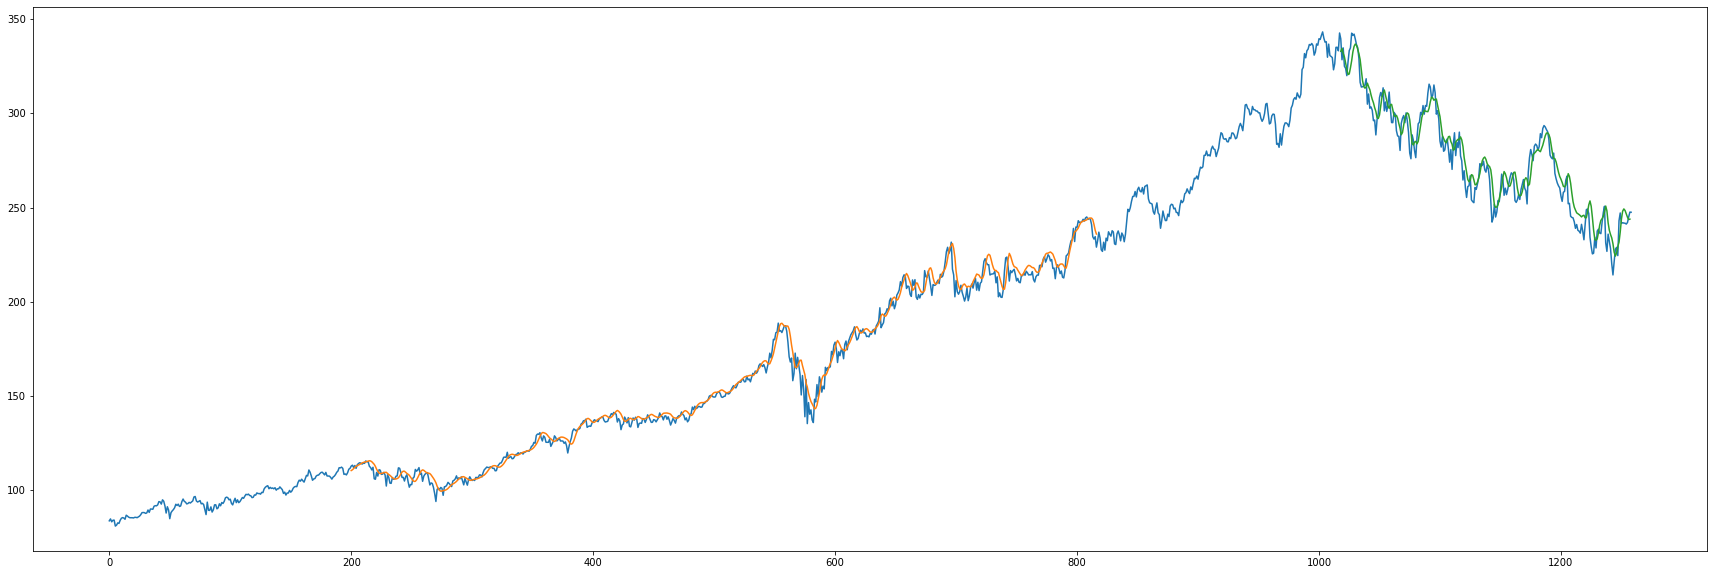

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=200
trainPredictPlot = numpy.empty_like(data1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(SD.inverse_transform(data1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()